In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm import tqdm  # 进度条库

In [9]:
# 长宽400 400
x = np.linspace(0, 1.0, 401)
y = np.linspace(0, 1.0, 401)
X, Y = np.meshgrid(x, y)
T_1 = np.zeros_like(X)
x_1 = np.linspace(0.005, 0.995, 399)  # 对应的x坐标数组，长度399
q_1 = np.zeros_like(x_1)
T_2 = np.zeros_like(X)
q_2 = np.zeros_like(x_1)

In [10]:
x

array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
       0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
       0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525, 0.055 , 0.0575,
       0.06  , 0.0625, 0.065 , 0.0675, 0.07  , 0.0725, 0.075 , 0.0775,
       0.08  , 0.0825, 0.085 , 0.0875, 0.09  , 0.0925, 0.095 , 0.0975,
       0.1   , 0.1025, 0.105 , 0.1075, 0.11  , 0.1125, 0.115 , 0.1175,
       0.12  , 0.1225, 0.125 , 0.1275, 0.13  , 0.1325, 0.135 , 0.1375,
       0.14  , 0.1425, 0.145 , 0.1475, 0.15  , 0.1525, 0.155 , 0.1575,
       0.16  , 0.1625, 0.165 , 0.1675, 0.17  , 0.1725, 0.175 , 0.1775,
       0.18  , 0.1825, 0.185 , 0.1875, 0.19  , 0.1925, 0.195 , 0.1975,
       0.2   , 0.2025, 0.205 , 0.2075, 0.21  , 0.2125, 0.215 , 0.2175,
       0.22  , 0.2225, 0.225 , 0.2275, 0.23  , 0.2325, 0.235 , 0.2375,
       0.24  , 0.2425, 0.245 , 0.2475, 0.25  , 0.2525, 0.255 , 0.2575,
       0.26  , 0.2625, 0.265 , 0.2675, 0.27  , 0.2725, 0.275 , 0.2775,
      

In [11]:
y

array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
       0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
       0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525, 0.055 , 0.0575,
       0.06  , 0.0625, 0.065 , 0.0675, 0.07  , 0.0725, 0.075 , 0.0775,
       0.08  , 0.0825, 0.085 , 0.0875, 0.09  , 0.0925, 0.095 , 0.0975,
       0.1   , 0.1025, 0.105 , 0.1075, 0.11  , 0.1125, 0.115 , 0.1175,
       0.12  , 0.1225, 0.125 , 0.1275, 0.13  , 0.1325, 0.135 , 0.1375,
       0.14  , 0.1425, 0.145 , 0.1475, 0.15  , 0.1525, 0.155 , 0.1575,
       0.16  , 0.1625, 0.165 , 0.1675, 0.17  , 0.1725, 0.175 , 0.1775,
       0.18  , 0.1825, 0.185 , 0.1875, 0.19  , 0.1925, 0.195 , 0.1975,
       0.2   , 0.2025, 0.205 , 0.2075, 0.21  , 0.2125, 0.215 , 0.2175,
       0.22  , 0.2225, 0.225 , 0.2275, 0.23  , 0.2325, 0.235 , 0.2375,
       0.24  , 0.2425, 0.245 , 0.2475, 0.25  , 0.2525, 0.255 , 0.2575,
       0.26  , 0.2625, 0.265 , 0.2675, 0.27  , 0.2725, 0.275 , 0.2775,
      

In [12]:
# 边界条件
T_top = 0
T_left = 0
T_right = 0
T_bottom = 100

# 迭代次数
iterations = 100000

# 设置边界条件
T_1[0, :] = T_bottom
T_1[-1, :] = T_top
T_1[:, 0] = T_right
T_1[:, -1] = T_left

T_2[0, :] = T_bottom
T_2[-1, :] = T_top
T_2[:, 0] = T_right
T_2[:, -1] = T_left

In [6]:
T_1[100:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(101, 201))

In [7]:
T_2[100:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(101, 201))

In [14]:
# T_1[100:,80:121]=0
# T_2[80:121,100:]=0

In [15]:
# 缺陷区域掩码，True表示不更新（缺陷处）
mask_1 = np.zeros_like(T_1, dtype=bool)
mask_1[200:, 160:242] = True  # 纵向缺陷

mask_2 = np.zeros_like(T_2, dtype=bool)
mask_2[160:242, 200:] = True  # 横向缺陷

In [18]:
for _ in tqdm(range(iterations), desc='Iterating T_1'):
    T_old = T_1.copy()
    T_new = 0.25 * (T_old[2:, 1:-1] + T_old[:-2, 1:-1] + T_old[1:-1, 2:] + T_old[1:-1, :-2])
    mask_update = ~mask_1[1:-1, 1:-1]
    T_1[1:-1, 1:-1][mask_update] = T_new[mask_update]

Iterating T_1: 100%|██████████████████████████████████████████████████████████| 100000/100000 [06:38<00:00, 250.71it/s]


In [19]:
# 迭代计算 T_2，带进度条和矢量化
for _ in tqdm(range(iterations), desc='Iterating T_2'):
    T_old = T_2.copy()
    T_new = 0.25 * (T_old[2:, 1:-1] + T_old[:-2, 1:-1] + T_old[1:-1, 2:] + T_old[1:-1, :-2])
    mask_update = ~mask_2[1:-1, 1:-1]
    T_2[1:-1, 1:-1][mask_update] = T_new[mask_update]


Iterating T_2: 100%|██████████████████████████████████████████████████████████| 100000/100000 [07:48<00:00, 213.63it/s]


In [20]:
for i in range(1, 400):
    q_1[i-1] = T_1[0, i] - T_1[1, i]
    q_2[i-1] = T_2[0, i] - T_2[1, i]

print(np.trapezoid(q_1, x_1))
print(np.trapezoid(q_2, x_1))


1.7796800497842593
1.819637211584287


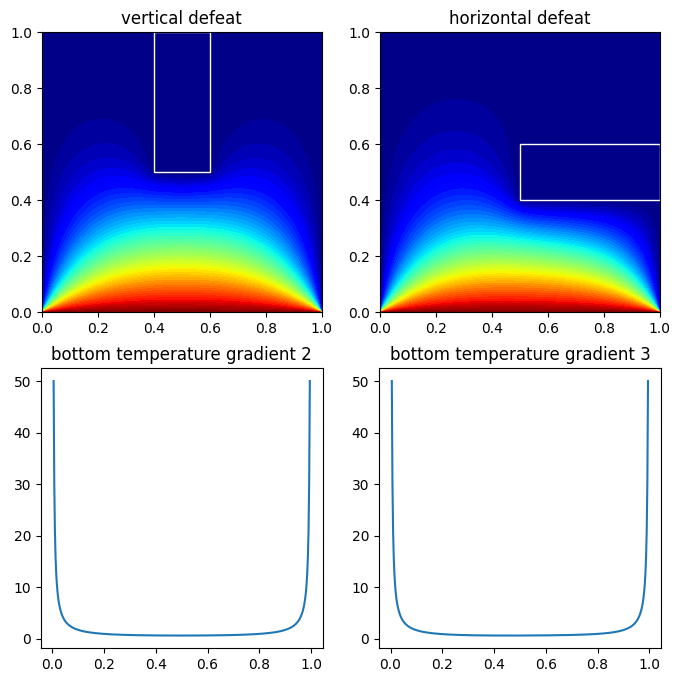

In [21]:
#完成可视化
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(2,2,1)
ax1.contourf(X,Y,T_1,50,cmap='jet')
rect = Rectangle((0.4, 0.5), 0.2, 0.5, linewidth=1, edgecolor='white', facecolor='none')
ax1.add_patch(rect)
ax1.set_aspect('equal')
ax1.set_title('vertical defeat')
ax2=fig.add_subplot(2,2,2)
ax2.contourf(X,Y,T_2,50,cmap='jet')
rect2 = Rectangle((0.5,0.4), 0.5, 0.2, linewidth=1, edgecolor='white', facecolor='none')
ax2.add_patch(rect2)
ax2.set_aspect('equal')
ax2.set_title('horizontal defeat')
ax3=fig.add_subplot(2,2,3)
ax3.plot(x_1,q_1)
ax3.set_title('bottom temperature gradient 2')
ax4=fig.add_subplot(2,2,4)
ax4.plot(x_1,q_2)
ax4.set_title('bottom temperature gradient 3')
plt.show()